In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import glob

In [4]:
glob.glob(r'fiveyr_individual_stocks/*csv')

['fiveyr_individual_stocks\\AAL_data.csv',
 'fiveyr_individual_stocks\\AAPL_data.csv',
 'fiveyr_individual_stocks\\AAP_data.csv',
 'fiveyr_individual_stocks\\ABBV_data.csv',
 'fiveyr_individual_stocks\\ABC_data.csv',
 'fiveyr_individual_stocks\\ABT_data.csv',
 'fiveyr_individual_stocks\\ACN_data.csv',
 'fiveyr_individual_stocks\\ADBE_data.csv',
 'fiveyr_individual_stocks\\ADI_data.csv',
 'fiveyr_individual_stocks\\ADM_data.csv',
 'fiveyr_individual_stocks\\ADP_data.csv',
 'fiveyr_individual_stocks\\ADSK_data.csv',
 'fiveyr_individual_stocks\\ADS_data.csv',
 'fiveyr_individual_stocks\\AEE_data.csv',
 'fiveyr_individual_stocks\\AEP_data.csv',
 'fiveyr_individual_stocks\\AES_data.csv',
 'fiveyr_individual_stocks\\AET_data.csv',
 'fiveyr_individual_stocks\\AFL_data.csv',
 'fiveyr_individual_stocks\\AGN_data.csv',
 'fiveyr_individual_stocks\\AIG_data.csv',
 'fiveyr_individual_stocks\\AIV_data.csv',
 'fiveyr_individual_stocks\\AIZ_data.csv',
 'fiveyr_individual_stocks\\AJG_data.csv',
 'fivey

Length of the CSV files

In [5]:
len(glob.glob(r'fiveyr_individual_stocks/*csv'))

505

# DATA COLLECTION - EXTRACT PHASE

Analysing Datasets of FAANGM Companies

In [6]:
companies_list = [
    r'fiveyr_individual_stocks\\AAPL_data.csv',
    r'fiveyr_individual_stocks\\AMZN_data.csv',
    r'fiveyr_individual_stocks\\FB_data.csv',
    r'fiveyr_individual_stocks\\GOOGL_data.csv',
    r'fiveyr_individual_stocks\\MSFT_data.csv',
    r'fiveyr_individual_stocks\\NFLX_data.csv' 
]

In [18]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [19]:
all_data = pd.DataFrame()

for file in companies_list:
    current_df = pd.read_csv(file)
    
    all_data = current_df._append(all_data, ignore_index=True)
    

In [20]:
all_data.shape

(7554, 7)

In [21]:
all_data.head(5)

date     open     high      low    close    volume  Name
0  2013-02-08  25.9635  26.2800  25.7157  25.8528  25649820  NFLX
1  2013-02-11  25.5685  26.0071  24.9714  25.4128  29321782  NFLX
2  2013-02-12  25.8085  26.2228  25.1014  25.4214  34388802  NFLX
3  2013-02-13  25.8428  26.6285  25.6657  26.6098  40799094  NFLX
4  2013-02-14  26.7557  27.1214  26.3844  26.7714  31968685  NFLX

In [22]:
all_data['Name'].unique()

array(['NFLX', 'MSFT', 'GOOGL', 'FB', 'AMZN', 'AAPL'], dtype=object)

# TRANSFORM PHASE

### Analysing the change in prices of the stock overtime

Checking for any missing values

In [25]:
all_data.isnull()

date   open   high    low  close  volume   Name
0     False  False  False  False  False   False  False
1     False  False  False  False  False   False  False
2     False  False  False  False  False   False  False
3     False  False  False  False  False   False  False
4     False  False  False  False  False   False  False
...     ...    ...    ...    ...    ...     ...    ...
7549  False  False  False  False  False   False  False
7550  False  False  False  False  False   False  False
7551  False  False  False  False  False   False  False
7552  False  False  False  False  False   False  False
7553  False  False  False  False  False   False  False

[7554 rows x 7 columns]

In [26]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [27]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

Changing the date datatype to datetime

In [30]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [31]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
7549   2018-02-01
7550   2018-02-02
7551   2018-02-05
7552   2018-02-06
7553   2018-02-07
Name: date, Length: 7554, dtype: datetime64[ns]

In [32]:
tech_list = all_data['Name'].unique()

In [33]:
tech_list

array(['NFLX', 'MSFT', 'GOOGL', 'FB', 'AMZN', 'AAPL'], dtype=object)

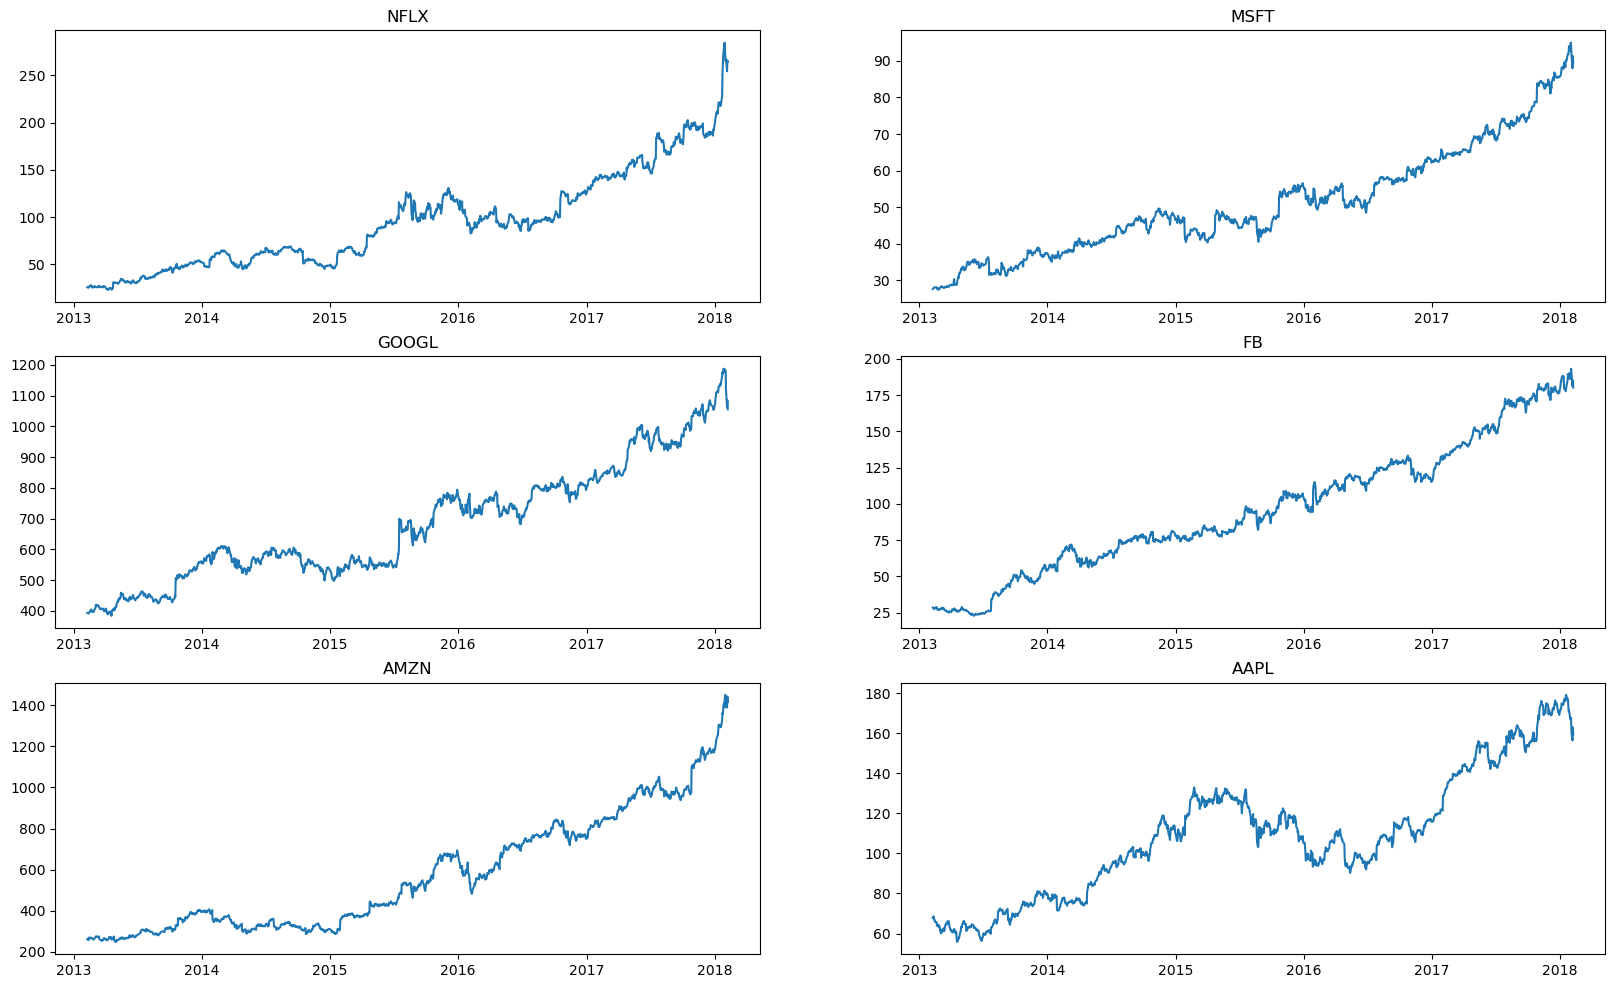

In [38]:
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list , 1):
    plt.subplot(3 , 2 , index) ## creating subplot for each stock
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'] , df['close']) ## plotting "date" vs "close"
    plt.title(company)

### Moving average of the various stocks

In [39]:
all_data.head(15)

date     open     high      low    close    volume  Name
0  2013-02-08  25.9635  26.2800  25.7157  25.8528  25649820  NFLX
1  2013-02-11  25.5685  26.0071  24.9714  25.4128  29321782  NFLX
2  2013-02-12  25.8085  26.2228  25.1014  25.4214  34388802  NFLX
3  2013-02-13  25.8428  26.6285  25.6657  26.6098  40799094  NFLX
4  2013-02-14  26.7557  27.1214  26.3844  26.7714  31968685  NFLX
5  2013-02-15  26.9385  27.1428  26.6085  27.0731  26651786  NFLX
6  2013-02-19  27.2857  28.1671  27.1643  28.0643  34126330  NFLX
7  2013-02-20  28.2257  28.2314  26.6428  26.7314  34992125  NFLX
8  2013-02-21  26.5714  27.4571  26.0714  26.7357  36822583  NFLX
9  2013-02-22  26.2457  26.2557  25.4900  25.6943  38841173  NFLX
10 2013-02-25  25.8557  26.7285  25.0643  25.6171  52156104  NFLX
11 2013-02-26  25.8000  26.4600  25.0857  26.2985  33878621  NFLX
12 2013-02-27  26.2257  26.5714  25.7944  26.3314  22583071  NFLX
13 2013-02-28  26.2585  27.4473  26.2157  26.8685  34291733  NFLX
14 2013-03-01  26.7300  27.1914  26.6014  27.0528  21448756  NFLX

In [45]:
all_data['close'].rolling(window=10).mean().head(15)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     26.43670
10    26.41313
11    26.50170
12    26.59270
13    26.61857
14    26.64671
Name: close, dtype: float64

In [46]:
new_data = all_data.copy()

In [47]:
ma_day = [10 ,20 , 50]

for ma in ma_day:
    new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean()

In [48]:
new_data

date      open      high       low     close    volume  Name  \
0    2013-02-08   25.9635   26.2800   25.7157   25.8528  25649820  NFLX   
1    2013-02-11   25.5685   26.0071   24.9714   25.4128  29321782  NFLX   
2    2013-02-12   25.8085   26.2228   25.1014   25.4214  34388802  NFLX   
3    2013-02-13   25.8428   26.6285   25.6657   26.6098  40799094  NFLX   
4    2013-02-14   26.7557   27.1214   26.3844   26.7714  31968685  NFLX   
...         ...       ...       ...       ...       ...       ...   ...   
7549 2018-02-01  167.1650  168.6200  166.7600  167.7800  47230787  AAPL   
7550 2018-02-02  166.0000  166.8000  160.1000  160.5000  86593825  AAPL   
7551 2018-02-05  159.1000  163.8800  156.0000  156.4900  72738522  AAPL   
7552 2018-02-06  154.8300  163.7200  154.0000  163.0300  68243838  AAPL   
7553 2018-02-07  163.0850  163.4000  159.0685  159.5400  51608580  AAPL   

      close_10  close_20  close_50  
0          NaN       NaN       NaN  
1          NaN       NaN       NaN  
2          NaN       NaN       NaN  
3          NaN       NaN       NaN  
4          NaN       NaN       NaN  
...        ...       ...       ...  
7549   171.948  173.8700  172.8252  
7550   170.152  173.2435  172.6356  
7551   168.101  172.3180  172.3026  
7552   166.700  171.7520  172.0640  
7553   165.232  171.0125  171.7554  

[7554 rows x 10 columns]

In [49]:
new_data.tail(7)

date     open      high       low   close    volume  Name  \
7547 2018-01-30  165.525  167.3700  164.7000  166.97  46048185  AAPL   
7548 2018-01-31  166.870  168.4417  166.5000  167.43  32478930  AAPL   
7549 2018-02-01  167.165  168.6200  166.7600  167.78  47230787  AAPL   
7550 2018-02-02  166.000  166.8000  160.1000  160.50  86593825  AAPL   
7551 2018-02-05  159.100  163.8800  156.0000  156.49  72738522  AAPL   
7552 2018-02-06  154.830  163.7200  154.0000  163.03  68243838  AAPL   
7553 2018-02-07  163.085  163.4000  159.0685  159.54  51608580  AAPL   

      close_10  close_20  close_50  
7547   174.263  174.3340  172.9460  
7548   173.096  174.0925  172.8726  
7549   171.948  173.8700  172.8252  
7550   170.152  173.2435  172.6356  
7551   168.101  172.3180  172.3026  
7552   166.700  171.7520  172.0640  
7553   165.232  171.0125  171.7554

In [50]:
new_data.set_index('date' , inplace=True)

In [51]:
new_data

open      high       low     close    volume  Name  close_10  \
date                                                                           
2013-02-08   25.9635   26.2800   25.7157   25.8528  25649820  NFLX       NaN   
2013-02-11   25.5685   26.0071   24.9714   25.4128  29321782  NFLX       NaN   
2013-02-12   25.8085   26.2228   25.1014   25.4214  34388802  NFLX       NaN   
2013-02-13   25.8428   26.6285   25.6657   26.6098  40799094  NFLX       NaN   
2013-02-14   26.7557   27.1214   26.3844   26.7714  31968685  NFLX       NaN   
...              ...       ...       ...       ...       ...   ...       ...   
2018-02-01  167.1650  168.6200  166.7600  167.7800  47230787  AAPL   171.948   
2018-02-02  166.0000  166.8000  160.1000  160.5000  86593825  AAPL   170.152   
2018-02-05  159.1000  163.8800  156.0000  156.4900  72738522  AAPL   168.101   
2018-02-06  154.8300  163.7200  154.0000  163.0300  68243838  AAPL   166.700   
2018-02-07  163.0850  163.4000  159.0685  159.5400  51608580  AAPL   165.232   

            close_20  close_50  
date                            
2013-02-08       NaN       NaN  
2013-02-11       NaN       NaN  
2013-02-12       NaN       NaN  
2013-02-13       NaN       NaN  
2013-02-14       NaN       NaN  
...              ...       ...  
2018-02-01  173.8700  172.8252  
2018-02-02  173.2435  172.6356  
2018-02-05  172.3180  172.3026  
2018-02-06  171.7520  172.0640  
2018-02-07  171.0125  171.7554  

[7554 rows x 9 columns]

In [52]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

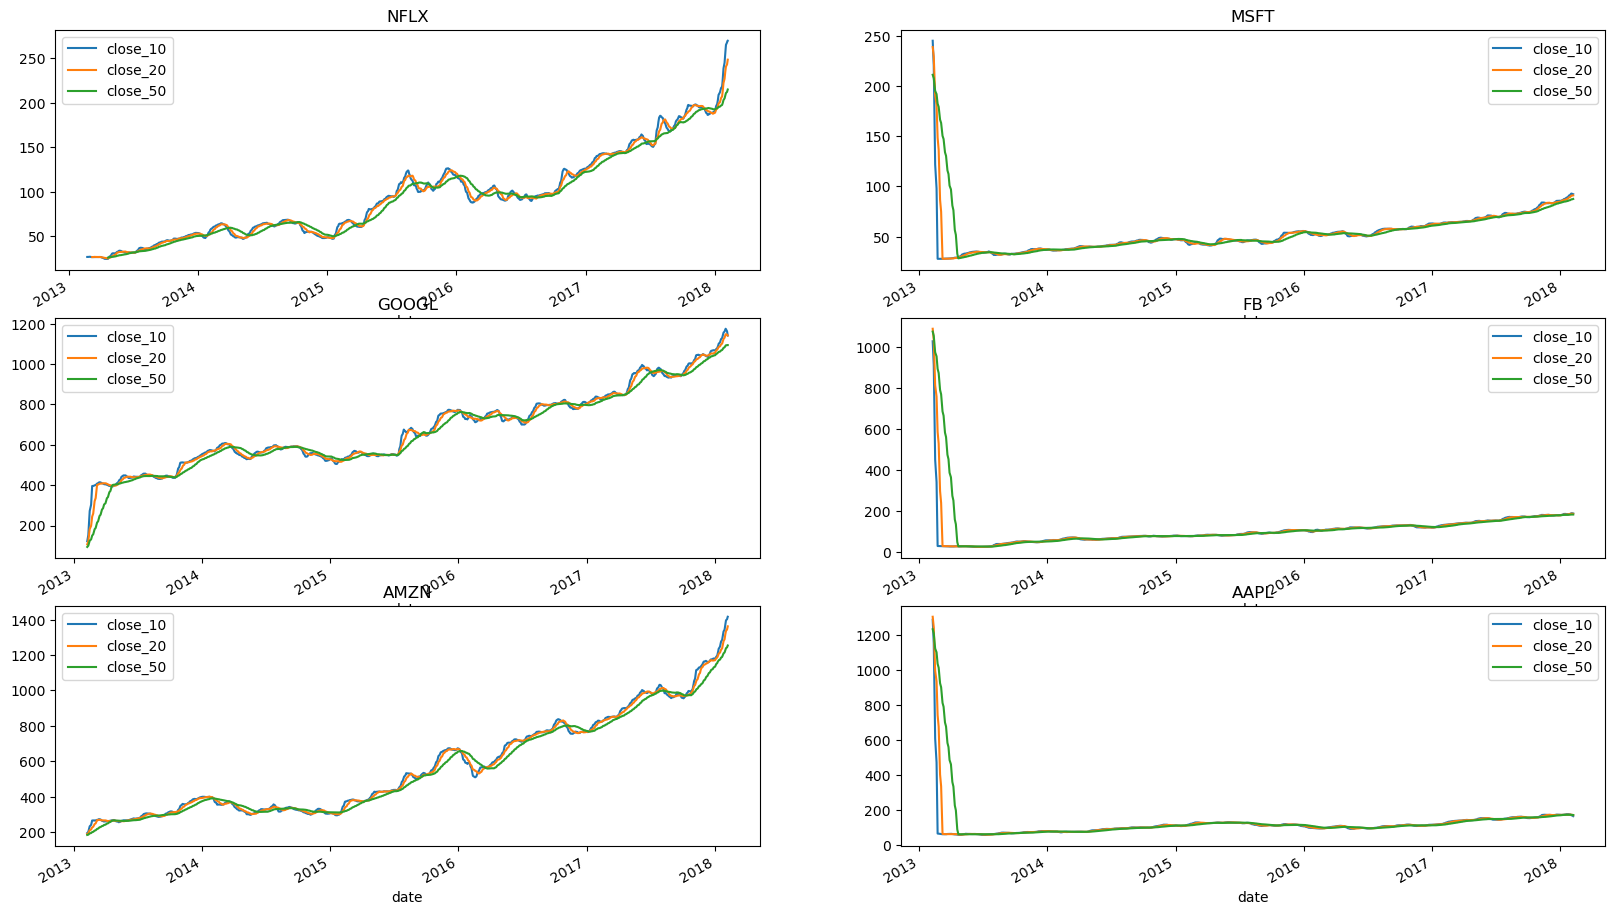

In [53]:
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list , 1):
    plt.subplot(3 , 2 , index)
    filter1 = new_data['Name']==company
    df = new_data[filter1]
    df[['close_10','close_20', 'close_50']].plot(ax=plt.gca())
    plt.title(company)

# Analysing Closing price change in Apple stock

In [55]:
companies_list

['fiveyr_individual_stocks\\\\AAPL_data.csv',
 'fiveyr_individual_stocks\\\\AMZN_data.csv',
 'fiveyr_individual_stocks\\\\FB_data.csv',
 'fiveyr_individual_stocks\\\\GOOGL_data.csv',
 'fiveyr_individual_stocks\\\\MSFT_data.csv',
 'fiveyr_individual_stocks\\\\NFLX_data.csv']

In [57]:
apple = pd.read_csv(r'fiveyr_individual_stocks/AAPL_data.csv')

In [58]:
apple.head(5)

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [59]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [60]:
apple['close'].pct_change() * 100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: close, Length: 1259, dtype: float64

In [61]:
apple.head(5)

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [62]:
apple['Daily return(in %)'] = apple['close'].pct_change() * 100

In [63]:
apple.head(5)

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   Daily return(in %)  
0                 NaN  
1            1.042235  
2           -2.506658  
3           -0.190297  
4           -0.089934

In [64]:
import plotly.express as px

In [65]:
px.line(apple , x="date" , y="Daily return(in %)")

# Analysing Closing price change in Netflix stock

In [66]:
netflix = pd.read_csv(r'fiveyr_individual_stocks/NFLX_data.csv')

In [67]:
netflix.head(5)

date     open     high      low    close    volume  Name
0  2013-02-08  25.9635  26.2800  25.7157  25.8528  25649820  NFLX
1  2013-02-11  25.5685  26.0071  24.9714  25.4128  29321782  NFLX
2  2013-02-12  25.8085  26.2228  25.1014  25.4214  34388802  NFLX
3  2013-02-13  25.8428  26.6285  25.6657  26.6098  40799094  NFLX
4  2013-02-14  26.7557  27.1214  26.3844  26.7714  31968685  NFLX

In [68]:
netflix['close']

0        25.8528
1        25.4128
2        25.4214
3        26.6098
4        26.7714
          ...   
1254    265.0700
1255    267.4300
1256    254.2600
1257    265.7200
1258    264.5600
Name: close, Length: 1259, dtype: float64

In [69]:
netflix.head(5)

date     open     high      low    close    volume  Name
0  2013-02-08  25.9635  26.2800  25.7157  25.8528  25649820  NFLX
1  2013-02-11  25.5685  26.0071  24.9714  25.4128  29321782  NFLX
2  2013-02-12  25.8085  26.2228  25.1014  25.4214  34388802  NFLX
3  2013-02-13  25.8428  26.6285  25.6657  26.6098  40799094  NFLX
4  2013-02-14  26.7557  27.1214  26.3844  26.7714  31968685  NFLX

In [70]:
netflix['Daily return(in %)'] = netflix['close'].pct_change() * 100

In [71]:
netflix.head(5)

date     open     high      low    close    volume  Name  \
0  2013-02-08  25.9635  26.2800  25.7157  25.8528  25649820  NFLX   
1  2013-02-11  25.5685  26.0071  24.9714  25.4128  29321782  NFLX   
2  2013-02-12  25.8085  26.2228  25.1014  25.4214  34388802  NFLX   
3  2013-02-13  25.8428  26.6285  25.6657  26.6098  40799094  NFLX   
4  2013-02-14  26.7557  27.1214  26.3844  26.7714  31968685  NFLX   

   Daily return(in %)  
0                 NaN  
1           -1.701943  
2            0.033841  
3            4.674802  
4            0.607295

In [72]:
px.line(netflix , x="date" , y="Daily return(in %)")

# Analysing Closing price change in Amazon stock

In [73]:
amazon = pd.read_csv(r'fiveyr_individual_stocks/AMZN_data.csv')

In [74]:
amazon.head(5)

date    open    high      low   close   volume  Name
0  2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN
1  2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN
2  2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN
3  2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN
4  2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN

In [75]:
amazon['close']

0        261.95
1        257.21
2        258.70
3        269.47
4        269.24
         ...   
1254    1390.00
1255    1429.95
1256    1390.00
1257    1442.84
1258    1416.78
Name: close, Length: 1259, dtype: float64

In [76]:
amazon['Daily return(in %)'] = amazon['close'].pct_change() * 100

In [77]:
amazon.head(5)

date    open    high      low   close   volume  Name  \
0  2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN   
1  2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN   
2  2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN   
3  2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN   
4  2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN   

   Daily return(in %)  
0                 NaN  
1           -1.809506  
2            0.579293  
3            4.163123  
4           -0.085353

In [78]:
px.line(amazon , x="date" , y="Daily return(in %)")

# Performing resampling analysis of closing price

In [79]:
apple.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily return(in %)    float64
dtype: object

In [80]:
apple['date'] =pd.to_datetime(apple['date'])

In [81]:
apple.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily return(in %)           float64
dtype: object

In [82]:
apple.head(4)

date     open     high      low    close     volume  Name  \
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   

   Daily return(in %)  
0                 NaN  
1            1.042235  
2           -2.506658  
3           -0.190297

In [83]:
apple.set_index('date' , inplace=True)

In [84]:
apple.head(4)

open     high      low    close     volume  Name  \
date                                                              
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   

            Daily return(in %)  
date                            
2013-02-08                 NaN  
2013-02-11            1.042235  
2013-02-12           -2.506658  
2013-02-13           -0.190297

In [89]:
apple['close'].resample('D').mean()

date
2013-02-08     67.8542
2013-02-09         NaN
2013-02-10         NaN
2013-02-11     68.5614
2013-02-12     66.8428
                ...   
2018-02-03         NaN
2018-02-04         NaN
2018-02-05    156.4900
2018-02-06    163.0300
2018-02-07    159.5400
Freq: D, Name: close, Length: 1826, dtype: float64

<Axes: xlabel='date'>

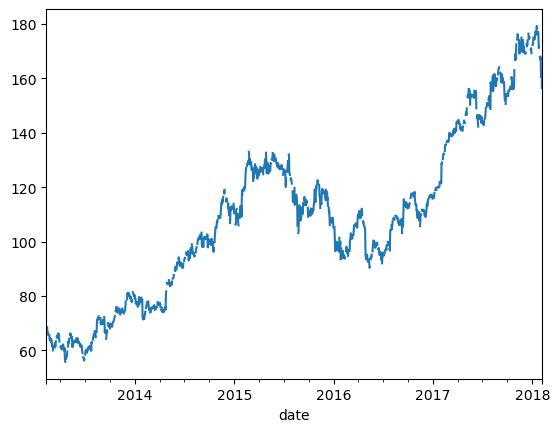

In [90]:
apple['close'].resample('D').mean().plot()

In [85]:
apple['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

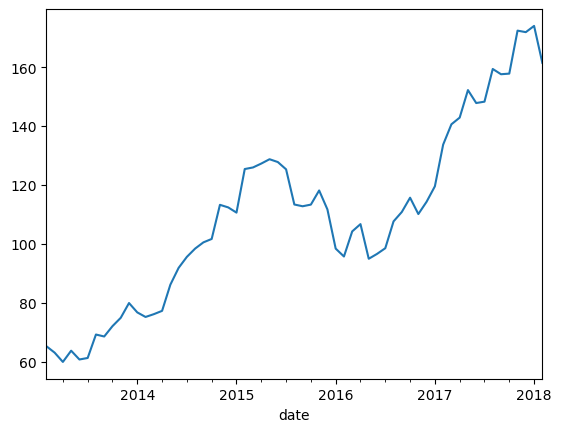

In [86]:
apple['close'].resample('M').mean().plot()

In [87]:
apple['close'].resample('Y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

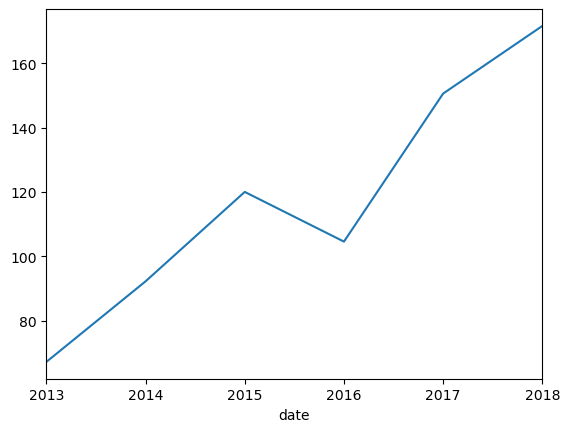

In [88]:
apple['close'].resample('Y').mean().plot()

In [92]:
apple['close'].resample('Q').mean()

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

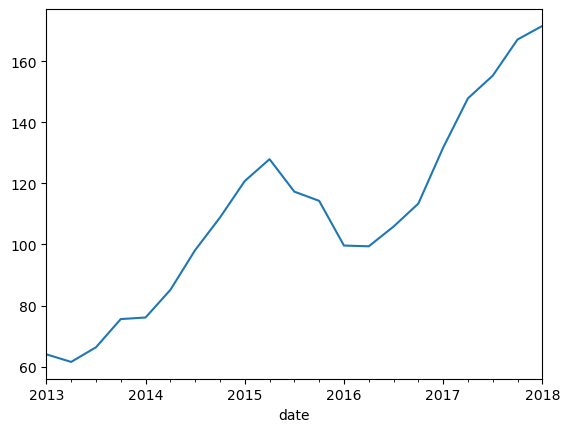

In [93]:
apple['close'].resample('Q').mean().plot()

# Analysing Whether closing prices of these tech companies (Amazon,Apple,Facebook,Google,Netflix,Microsoft) are correlated or not

In [94]:
companies_list

['fiveyr_individual_stocks\\\\AAPL_data.csv',
 'fiveyr_individual_stocks\\\\AMZN_data.csv',
 'fiveyr_individual_stocks\\\\FB_data.csv',
 'fiveyr_individual_stocks\\\\GOOGL_data.csv',
 'fiveyr_individual_stocks\\\\MSFT_data.csv',
 'fiveyr_individual_stocks\\\\NFLX_data.csv']

In [97]:
app = pd.read_csv(companies_list[0])
amzn = pd.read_csv(companies_list[1])
fb = pd.read_csv(companies_list[2])
google = pd.read_csv(companies_list[3])
msft = pd.read_csv(companies_list[4])
nfx = pd.read_csv(companies_list[5])

In [98]:
closing_price = pd.DataFrame()

In [99]:
closing_price['apple_close'] = app['close']
closing_price['amzn_close'] = amzn['close']
closing_price['fb_close'] = fb['close']
closing_price['goog_close'] = google['close']
closing_price['msft_close'] = msft['close']
closing_price['nfx_close'] = nfx['close']

In [100]:
closing_price

apple_close  amzn_close  fb_close  goog_close  msft_close  nfx_close
0         67.8542      261.95   28.5450    393.0777       27.55    25.8528
1         68.5614      257.21   28.2600    391.6012       27.86    25.4128
2         66.8428      258.70   27.3700    390.7403       27.88    25.4214
3         66.7156      269.47   27.9075    391.8214       28.03    26.6098
4         66.6556      269.24   28.5000    394.3039       28.04    26.7714
...           ...         ...       ...         ...         ...        ...
1254     167.7800     1390.00  193.0900   1181.5900       94.26   265.0700
1255     160.5000     1429.95  190.2800   1119.2000       91.78   267.4300
1256     156.4900     1390.00  181.2600   1062.3900       88.00   254.2600
1257     163.0300     1442.84  185.3100   1084.4300       91.33   265.7200
1258     159.5400     1416.78  180.1800   1055.4100       89.61   264.5600

[1259 rows x 6 columns]

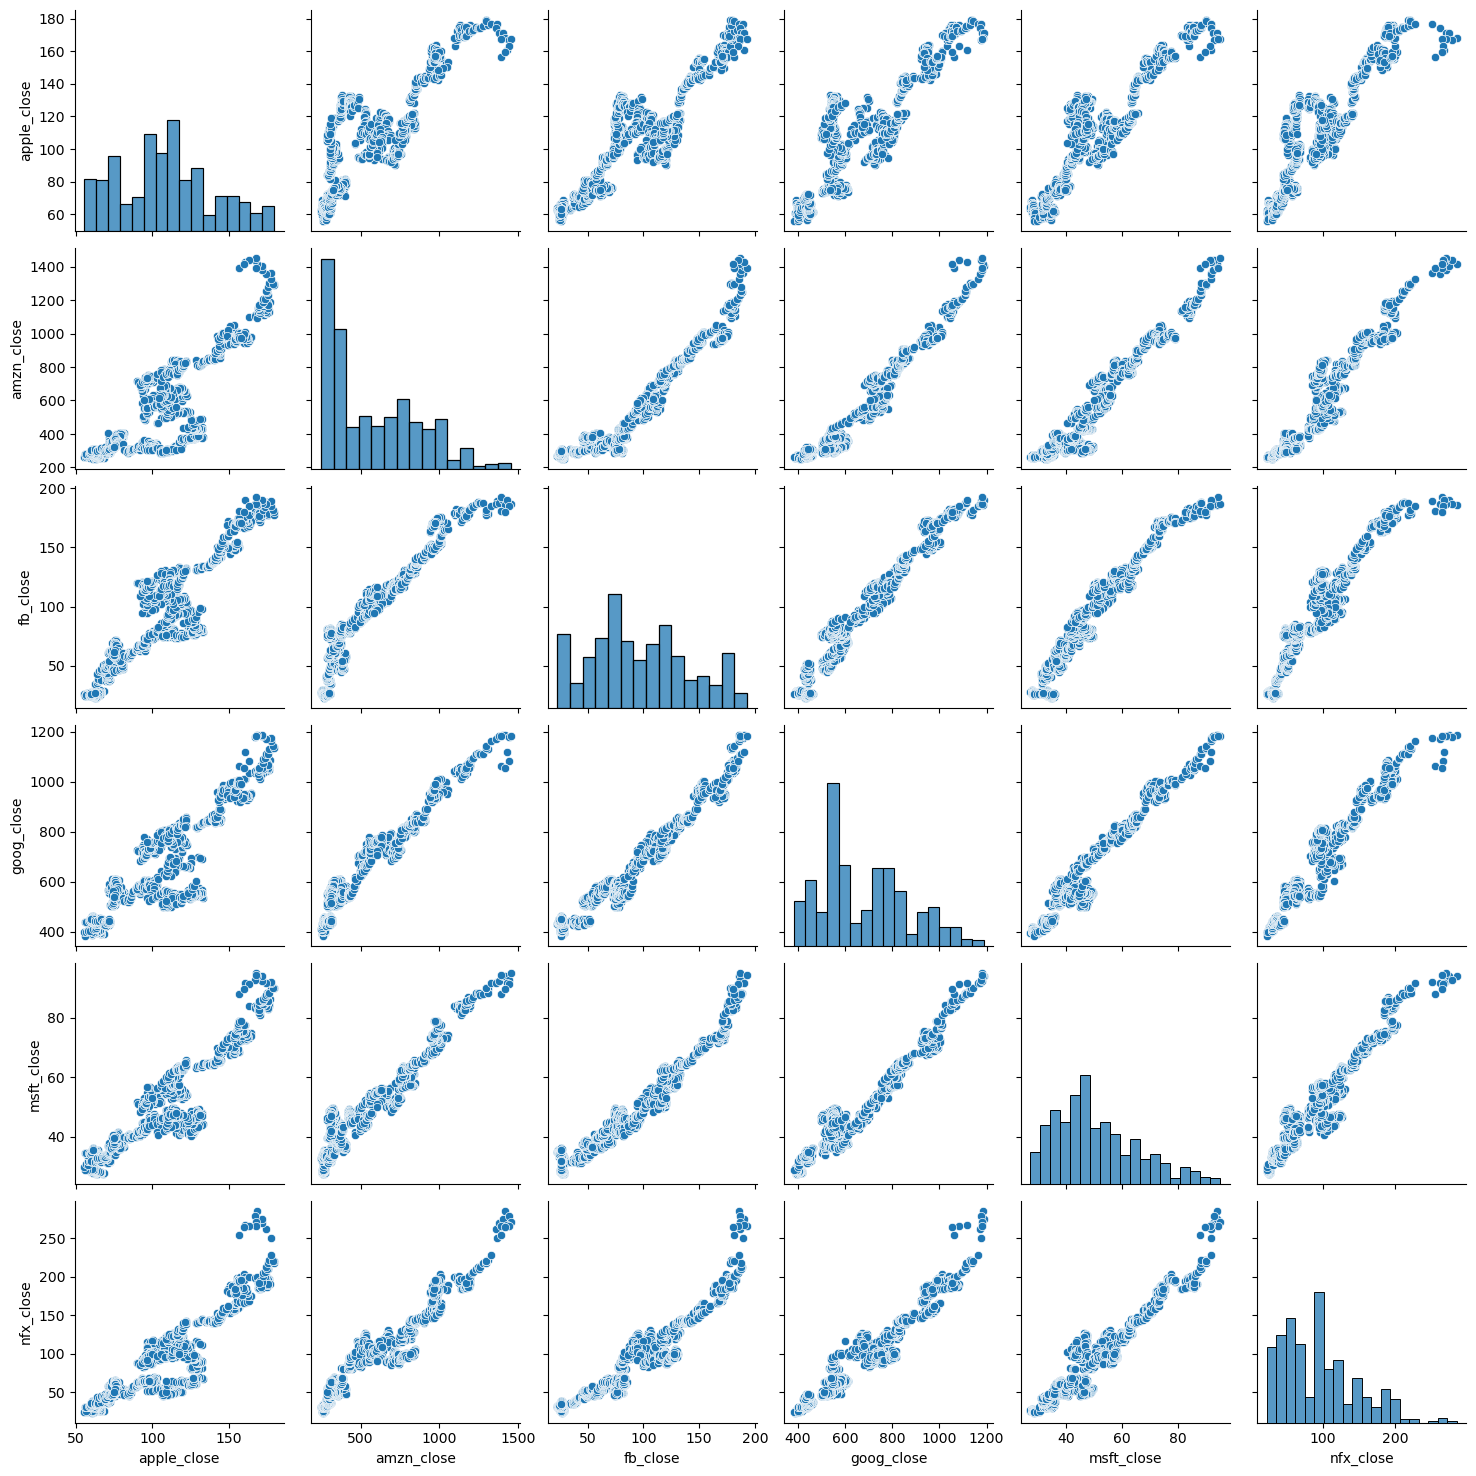

In [101]:
sns.pairplot(closing_price)

In [102]:
closing_price.corr()

apple_close  amzn_close  fb_close  goog_close  msft_close  \
apple_close     1.000000    0.819078  0.896413    0.843736    0.899689   
amzn_close      0.819078    1.000000  0.954389    0.973988    0.955977   
fb_close        0.896413    0.954389  1.000000    0.974395    0.969819   
goog_close      0.843736    0.973988  0.974395    1.000000    0.970779   
msft_close      0.899689    0.955977  0.969819    0.970779    1.000000   
nfx_close       0.890357    0.954919  0.950314    0.960020    0.958859   

             nfx_close  
apple_close   0.890357  
amzn_close    0.954919  
fb_close      0.950314  
goog_close    0.960020  
msft_close    0.958859  
nfx_close     1.000000

co-relation plot for stock prices

<Axes: >

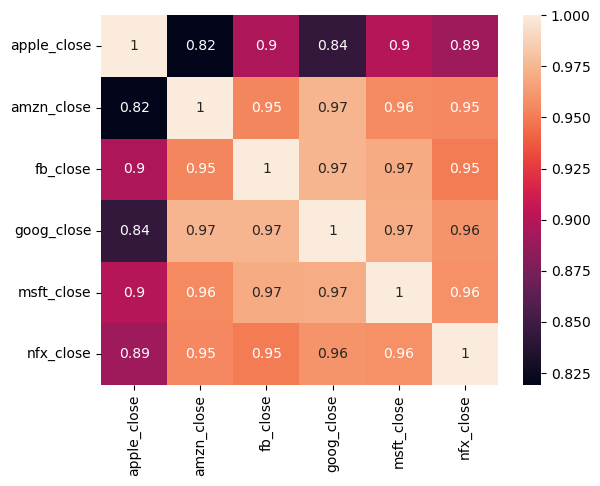

In [103]:
sns.heatmap(closing_price.corr() , annot=True)

# Conclusions : 
# Closing price of Google and Microsoft, Facebook and Microsoft, Google and Facebook, Amazon and Google are well correlated. Closing prices have a co-relation of 0.97


Analysing Whether Daily change in Closing price of stocks or Daily Returns in Stock are co-related or not !

In [104]:
closing_price

apple_close  amzn_close  fb_close  goog_close  msft_close  nfx_close
0         67.8542      261.95   28.5450    393.0777       27.55    25.8528
1         68.5614      257.21   28.2600    391.6012       27.86    25.4128
2         66.8428      258.70   27.3700    390.7403       27.88    25.4214
3         66.7156      269.47   27.9075    391.8214       28.03    26.6098
4         66.6556      269.24   28.5000    394.3039       28.04    26.7714
...           ...         ...       ...         ...         ...        ...
1254     167.7800     1390.00  193.0900   1181.5900       94.26   265.0700
1255     160.5000     1429.95  190.2800   1119.2000       91.78   267.4300
1256     156.4900     1390.00  181.2600   1062.3900       88.00   254.2600
1257     163.0300     1442.84  185.3100   1084.4300       91.33   265.7200
1258     159.5400     1416.78  180.1800   1055.4100       89.61   264.5600

[1259 rows x 6 columns]

In [105]:
closing_price['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

In [106]:
closing_price['apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

In [107]:
(closing_price['apple_close'] - closing_price['apple_close'].shift(1))/closing_price['apple_close'].shift(1) * 100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [108]:
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1) * 100

In [109]:
closing_price

apple_close  amzn_close  fb_close  goog_close  msft_close  nfx_close  \
0         67.8542      261.95   28.5450    393.0777       27.55    25.8528   
1         68.5614      257.21   28.2600    391.6012       27.86    25.4128   
2         66.8428      258.70   27.3700    390.7403       27.88    25.4214   
3         66.7156      269.47   27.9075    391.8214       28.03    26.6098   
4         66.6556      269.24   28.5000    394.3039       28.04    26.7714   
...           ...         ...       ...         ...         ...        ...   
1254     167.7800     1390.00  193.0900   1181.5900       94.26   265.0700   
1255     160.5000     1429.95  190.2800   1119.2000       91.78   267.4300   
1256     156.4900     1390.00  181.2600   1062.3900       88.00   254.2600   
1257     163.0300     1442.84  185.3100   1084.4300       91.33   265.7200   
1258     159.5400     1416.78  180.1800   1055.4100       89.61   264.5600   

      apple_close_pct_change  amzn_close_pct_change  fb_close_pct_change  \
0                        NaN                    NaN                  NaN   
1                   1.042235              -1.809506            -0.998424   
2                  -2.506658               0.579293            -3.149328   
3                  -0.190297               4.163123             1.963829   
4                  -0.089934              -0.085353             2.123085   
...                      ...                    ...                  ...   
1254                0.209043              -4.196734             3.317459   
1255               -4.339015               2.874101            -1.455280   
1256               -2.498442              -2.793804            -4.740383   
1257                4.179181               3.801439             2.234359   
1258               -2.140710              -1.806160            -2.768334   

      goog_close_pct_change  msft_close_pct_change  nfx_close_pct_change  
0                       NaN                    NaN                   NaN  
1                 -0.375625               1.125227             -1.701943  
2                 -0.219841               0.071788              0.033841  
3                  0.276680               0.538020              4.674802  
4                  0.633579               0.035676              0.607295  
...                     ...                    ...                   ...  
1254              -0.053290              -0.789391             -1.934887  
1255              -5.280173              -2.631021              0.890331  
1256              -5.075947              -4.118544             -4.924653  
1257               2.074568               3.784091              4.507197  
1258              -2.676060              -1.883280             -0.436550  

[1259 rows x 12 columns]

In [110]:
closing_price.columns

Index(['apple_close', 'amzn_close', 'fb_close', 'goog_close', 'msft_close',
       'nfx_close', 'apple_close_pct_change', 'amzn_close_pct_change',
       'fb_close_pct_change', 'goog_close_pct_change', 'msft_close_pct_change',
       'nfx_close_pct_change'],
      dtype='object')

In [115]:
clsing_p = closing_price[['apple_close_pct_change', 'amzn_close_pct_change','fb_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change','nfx_close_pct_change']]

In [116]:
clsing_p

apple_close_pct_change  amzn_close_pct_change  fb_close_pct_change  \
0                        NaN                    NaN                  NaN   
1                   1.042235              -1.809506            -0.998424   
2                  -2.506658               0.579293            -3.149328   
3                  -0.190297               4.163123             1.963829   
4                  -0.089934              -0.085353             2.123085   
...                      ...                    ...                  ...   
1254                0.209043              -4.196734             3.317459   
1255               -4.339015               2.874101            -1.455280   
1256               -2.498442              -2.793804            -4.740383   
1257                4.179181               3.801439             2.234359   
1258               -2.140710              -1.806160            -2.768334   

      goog_close_pct_change  msft_close_pct_change  nfx_close_pct_change  
0                       NaN                    NaN                   NaN  
1                 -0.375625               1.125227             -1.701943  
2                 -0.219841               0.071788              0.033841  
3                  0.276680               0.538020              4.674802  
4                  0.633579               0.035676              0.607295  
...                     ...                    ...                   ...  
1254              -0.053290              -0.789391             -1.934887  
1255              -5.280173              -2.631021              0.890331  
1256              -5.075947              -4.118544             -4.924653  
1257               2.074568               3.784091              4.507197  
1258              -2.676060              -1.883280             -0.436550  

[1259 rows x 6 columns]

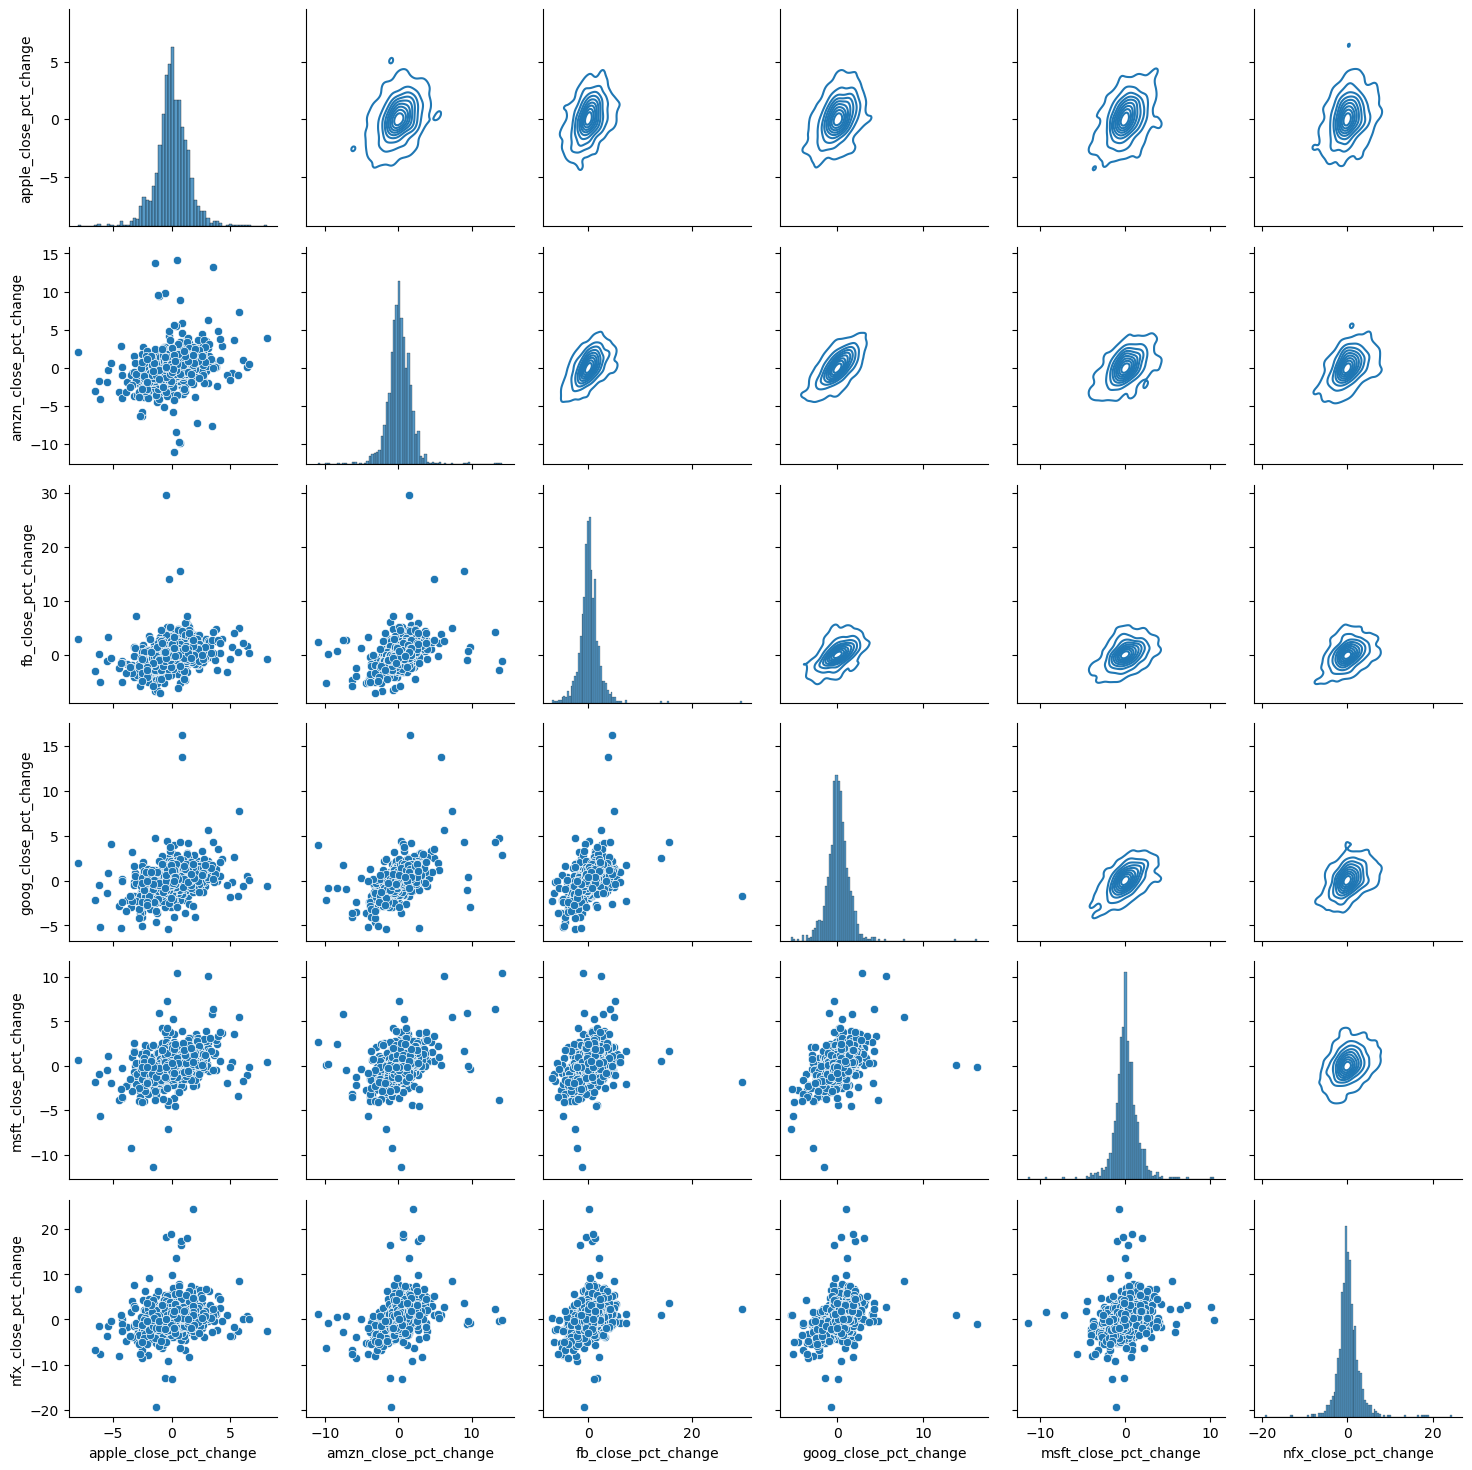

In [117]:
g = sns.PairGrid(data= clsing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [118]:
clsing_p.corr()

apple_close_pct_change  amzn_close_pct_change  \
apple_close_pct_change                1.000000               0.287659   
amzn_close_pct_change                 0.287659               1.000000   
fb_close_pct_change                   0.310517               0.428271   
goog_close_pct_change                 0.348858               0.548423   
msft_close_pct_change                 0.366598               0.402678   
nfx_close_pct_change                  0.227387               0.348460   

                        fb_close_pct_change  goog_close_pct_change  \
apple_close_pct_change             0.310517               0.348858   
amzn_close_pct_change              0.428271               0.548423   
fb_close_pct_change                1.000000               0.459305   
goog_close_pct_change              0.459305               1.000000   
msft_close_pct_change              0.313899               0.488373   
nfx_close_pct_change               0.305664               0.351317   

                        msft_close_pct_change  nfx_close_pct_change  
apple_close_pct_change               0.366598              0.227387  
amzn_close_pct_change                0.402678              0.348460  
fb_close_pct_change                  0.313899              0.305664  
goog_close_pct_change                0.488373              0.351317  
msft_close_pct_change                1.000000              0.249646  
nfx_close_pct_change                 0.249646              1.000000

### Amazon and Google stocks has highest correlation between them

Conclusion:
    If Amazon stocks decreases, then there is a 54% probablity that Google stocks also decreases